# 决策树对红酒数据集进行分类

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
import pandas as pd

/var/folders/hv/8yqbcj3952sdb8s0fwn7p_mm0000gn/T/ipykernel_50124/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis=1)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## 拆分训练集和测试集

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [11]:
ytrain

array([0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1])

## 建模

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=0 #
                                  #, splitter = "random"
                                  #, max_depth = 3 #剪枝参数，限制最大深度
                                  #, min_samples_leaf = 10 #剪枝参数，叶子结点最少样本数
                                  #, min_samples_split = 10 #剪枝参数，分枝条件最少样本数
                                 )
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest,ytest)
score

0.8703703703703703

### 算法

#### 如何选择节点特征及特征分割点

要解答这个问题，我们先需要知道“不纯度”的概念（所谓的纯与不纯，就是你理解的那个“纯”）
> 不纯度（impurity): 表示落在当前节点的样本类别分布的均衡程度，如果类别一致，那么不纯度为0。

不纯度的衡量指标，主要有如下三种算法：
+ 基尼指数（Gini index）
+ 信息熵（Entropy)
+ 误分率（Misclassification error)

##### 基尼指数

假设一共有$C$类，$p(C|t)$节点$t$中第$C$类样本的相对频率，则节点$t$的Gini指数为

$\Large Gini(t)=1-\sum_{c=1}^{c}[p(C|t)]^2$

根据基尼指数的计算公式，我们可以知道，当节点中各个类别的样本比例一致时，即均匀分布，Gini指数取得最大值$(1-\frac{1}{C}$)，节点不纯度最大；当节点中的样本全部属于一个类别时，Gini指数等于0，节点不纯度也最小。

我们假设n为父节点$t$中样本数量，节点$t$经过某种方式分裂后生成了$K$个子节点，$n_k$为第$k$个子节点$t_k$的样本数量。以每个子节点包含的样本数量占比作为权重，对子节点的Gini指数加权求和，就可以得到特征分裂后的Gini指数：

$\Large Gini_{split}=\sum\limits_{k=1}^{K}\frac{n_k}{n}Gini(t_k)$

对于不同的分裂方式，我们总是选择使得Gini指数下降值$(Gini(t_0) - Gini_{split})$最大的分裂方案

##### 信息熵

信息熵这个词是Shannon（香农）从热力学中借用过来的一个概念，用以度量信息的不确定度。我们可以使用信息熵来度量一个节点样本分布的不纯度。 假设数据集一共有$C$类，
$p(C|t)$是节点$t$中第$c$类样本的相对频率，则节点$t$的信息熵为

$\Large Entropy(t) = -\sum\limits_{c=1}^{C}p(C|t)log_2p(C|t)$ 

当节点中的样本均匀分布在每一个类别时，信息熵取得最大值$log_2C$，表示节点的不纯度最大。 当一个节点的所有的样本都属于某一个类别时，信息熵为$0$，这时该节点的不纯度最小。

基于节点信息熵的定义，我们可以计算节点分裂前后的信息熵的下降值，称为**信息增益**(Information Gain)：

$\Large InfoGain = Entropy(t_0) - \sum\limits_{k=1}^{K}\frac{n_k}{n}Entropy(t_k)$

我们挑选使得信息增益最大的特征进行分裂.

##### 误分率

误分率是另外一种度量节点不纯度的方法。 假设数据集一共有$C$类，在节点$t$中第$c$类数据的相对频率为$p(C|t)$，则节点$t$的误分率为

$\Large Error(t) = 1- max(p(1|t), p(2|t),... p(C|t))$

误分率所代表的含义为，当按照多数类来预测当前节点样本的类别时，被错误分类的数据的比例。 当样本均匀地分布在每一个类别时，误差率取得最大值$(1-\frac{1}{C})$，说明不纯度最大。 当样本都属于某一个类别时，误分率取得最小值$0$，说明不纯度最小。

##### 不纯度度量总结

Gini、信息熵、误分率是最为经典的不纯度度量方法。当子节点的样本相对频率为0或者1的时候，表示该节点样本类别一致，则不纯度都为0。而子节点的样本相对频率在0.5附近时，表示该节点样本类别均匀分布，此时，三种度量方法都达到最大值。

## 可视化

In [13]:
import graphviz

In [14]:
dot_data = tree.export_graphviz(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)

In [15]:
graph = graphviz.Source(dot_data)

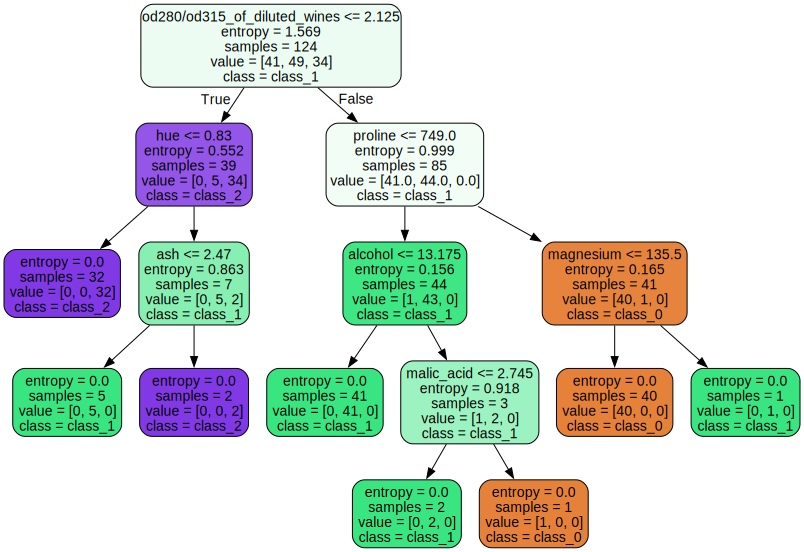

In [16]:
graph

In [17]:
clf.feature_importances_  # 查看树模型的特性权重值

array([0.02123041, 0.01415913, 0.0310529 , 0.        , 0.03485965,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0796925 , 0.45277792, 0.36622751])

In [18]:
[*zip(wine.feature_names, clf.feature_importances_)] # 对映特性

[('alcohol', 0.021230406153072978),
 ('malic_acid', 0.014159127458210886),
 ('ash', 0.03105289741515277),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.03485964517950234),
 ('total_phenols', 0.0),
 ('flavanoids', 0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.07969249627782363),
 ('od280/od315_of_diluted_wines', 0.4527779215353519),
 ('proline', 0.36622750598088555)]

## 剪枝参数

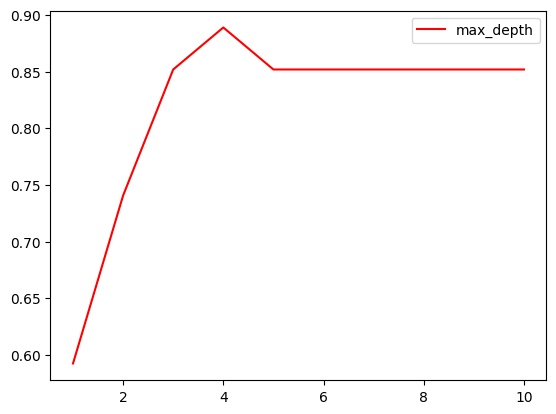

In [20]:
import matplotlib.pyplot as plt
test = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      , max_depth = i+1
                                      , random_state = 30
                                      , splitter = "random"
                                     )
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    test.append(score)
    
plt.plot(range(1, 11), test, color = "red", label = "max_depth")
plt.legend()
plt.show()

## 调参GS

# 回归树拟合正弦曲线

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [22]:
rng = np.random.RandomState(1)

In [23]:
X = np.sort(5*rng.rand(80,1), axis=0)

In [24]:
y = np.sin(X).ravel()

In [25]:
y[::5] += 3*(0.5 - rng.rand(16))

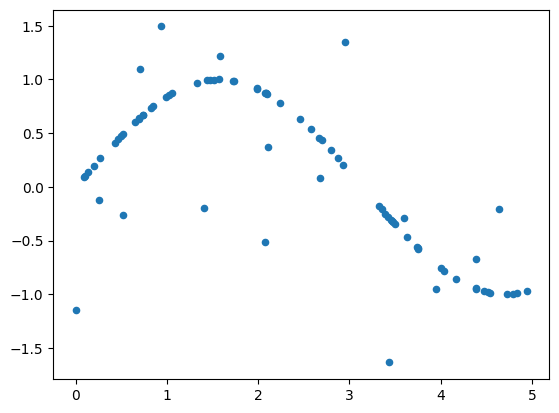

In [26]:
plt.figure()
plt.scatter(X, y, s=20)

In [27]:
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [28]:
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [29]:
y1 = regr1.predict(x_test)
y2 = regr2.predict(x_test)

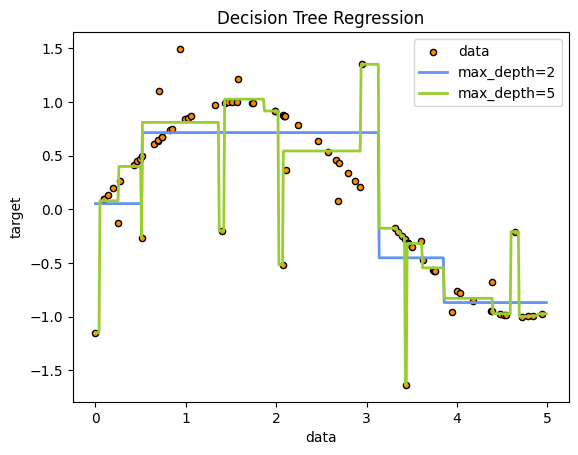

In [30]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 公式

R方

## 交叉验证

## 网格搜索